In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\HP\Downloads\train_u6lujuX_CVtuZ9i.csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [14]:
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
data2 = data.drop(columns=['Loan_ID','Gender']) 
print(data2.isnull().sum())

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [27]:
#data2['Married']=data2['Married'].fillna(data2['Married'].median())
data2['Married'].fillna('1.0',inplace=True)
data2['Self_Employed'].fillna('1.0',inplace=True)
data2['Dependents']= data2['Dependents'].fillna(data2['Dependents'].mean())
print(data2.isnull().sum())

TypeError: can only concatenate str (not "int") to str

In [15]:
############ Count number of Categorical and Numerical Columns ######################
data2 = data.drop(columns=['Loan_ID','Gender']) ## Dropping Loan ID

categorical_columns = [ 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


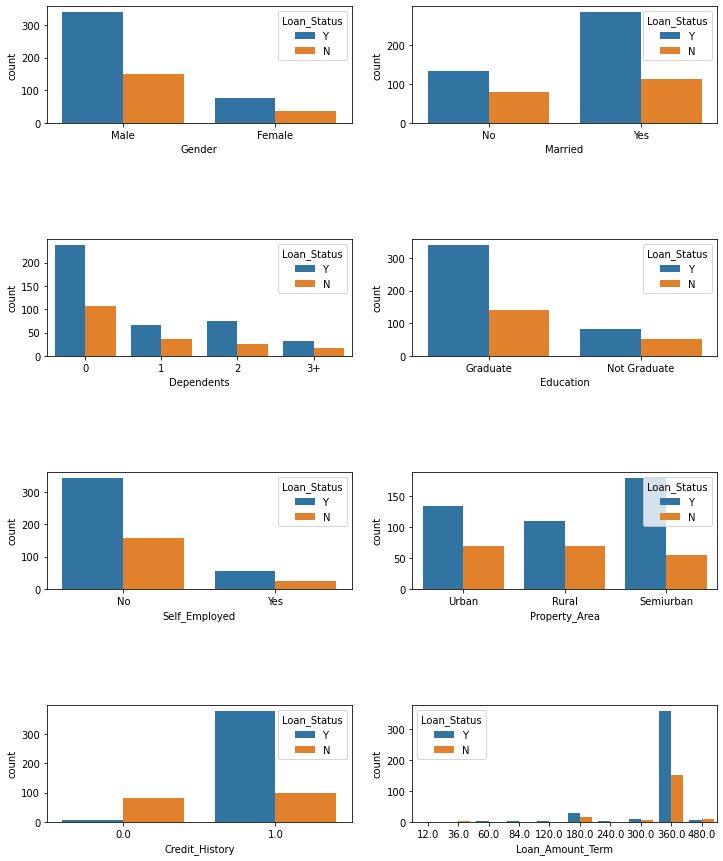

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data2,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [4]:

data2_encoded = pd.get_dummies(data2,drop_first=True)
data2_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [5]:
########## Split Features and Target Varible ############
X = data2_encoded.drop(columns='Loan_Status_Y')
Y = data2_encoded['Loan_Status_Y']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify =Y,random_state =42)


In [6]:
from sklearn.metrics import accuracy_score
import graphviz 
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train,Y_train)
Y_pred = tree_clf.predict(X_train)
Y_predTest = tree_clf.predict(X_test)

# tree_clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
# tree_clf.fit(X_train,Y_train)
# y_pred = tree_clf.predict(X_test_imp)
print("Train Accuracy: ",accuracy_score(Y_train,Y_pred))
print("Test Accuracy: ",accuracy_score(Y_test,Y_predTest))


Train Accuracy:  0.9226069246435845
Test Accuracy:  0.7398373983739838


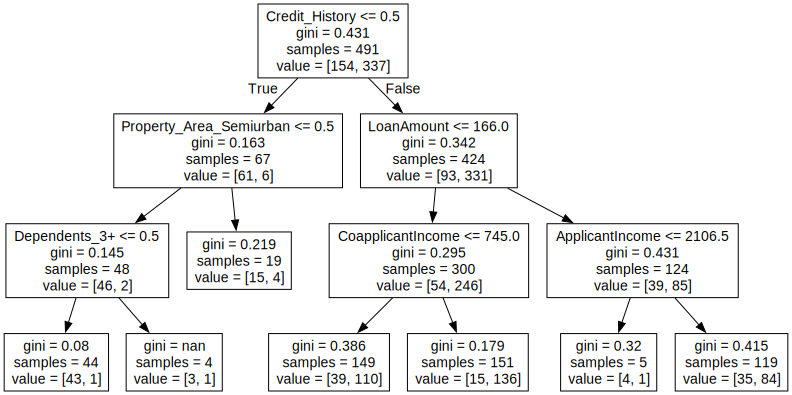

In [7]:
# import pydotplus 
# from IPython.display import Image

# dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
#                                 out_file=None) 
# graph = pydotplus.graph_from_dot_data(dot_data) 
# Image(graph.create_png())
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,Y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

Train Accuracy:  0.9470468431771895
Test Accuracy:  0.7886178861788617


Text(0, 0.5, 'Accuracy')

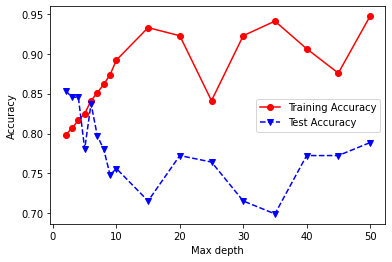

In [12]:
import numpy as np
#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
print("Train Accuracy: ",accuracy_score(Y_train, Y_predTrain))
print("Test Accuracy: ",accuracy_score(Y_test, Y_predTest))

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [10]:
Gender=pd.crosstab(data2['Gender'],data2['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [13]:
#______________________K NEAREST_____________________________
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_pred))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values